In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999
num_classes=5

In [2]:
from subprocess import check_output
print(check_output(["ls", "./dataset/regression"]).decode("utf8"))

bank32nh.data
bank8FM.data
bostonhousing
cal_housing.data
cpu_act.data
cpu_small.data
house_16H.data
house_8L.data



In [32]:
train_df_red = pd.read_csv("./dataset/ordinal/Wine Quality/winequality-red.csv", sep=';')
train_df_white = pd.read_csv("./dataset/ordinal/Wine Quality/winequality-white.csv", sep=';')

In [33]:
train_df = train_df_white.copy()
columns = list(train_df.columns)
columns[-1] = 'label'
train_df.columns = columns
train_df
train_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(array([    0.,     0.,     0.,    20.,   163.,  1457.,  2198.,   880.,
          175.,     5.,     0.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 11 Patch objects>)

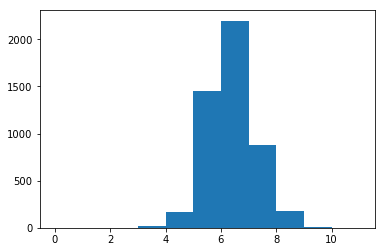

In [40]:
label=train_df.label.values
plt.hist(label, bins=range(12))


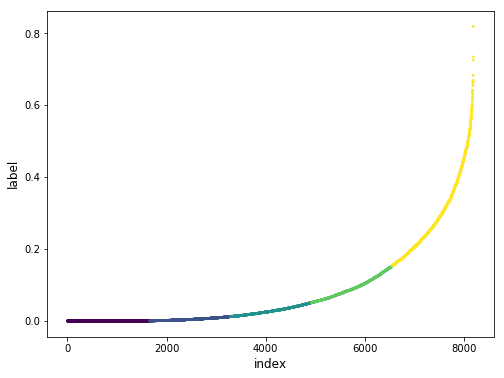

In [6]:
plt.figure(figsize=(8,6))
plt.scatter(range(train_df.shape[0]), label[sorted_idx],s=3,c=np.sort(label_ord[sorted_idx]))
plt.xlabel('index', fontsize=12)
plt.ylabel('label', fontsize=12)


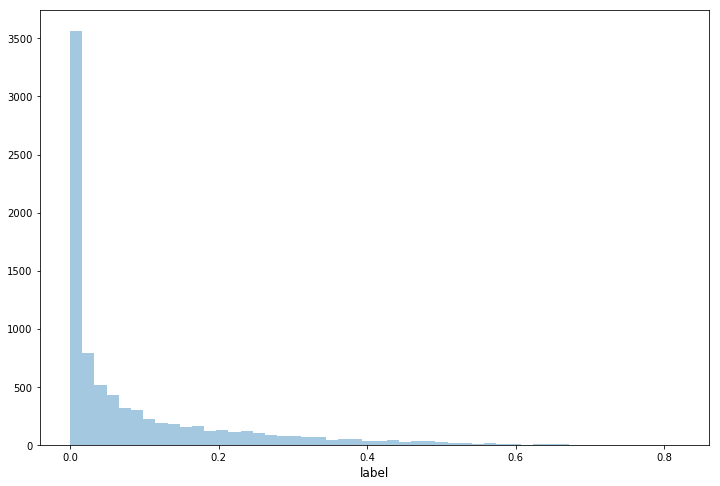

In [7]:
'''ulimit = np.percentile(train_df.label.values, 98)
llimit = np.percentile(train_df.label.values, 2)
train_df['label'].ix[train_df['label']>ulimit] = ulimit
train_df['label'].ix[train_df['label']<llimit] = llimit'''

plt.figure(figsize=(12,8))
sns.distplot(train_df.label.values, bins=50, kde=False)
plt.xlabel('label', fontsize=12)


# Training - Validation Split

In [56]:
feat=train_df.values[:,:-2]

#Normalize the features

feat_max = np.amax(feat,axis=0)
feat_min = np.amin(feat,axis=0)

feat=(feat-feat_min)/(feat_max-feat_min)
feat=feat*2-1

'''feat_mean = np.mean(feat,axis=0)
feat_std = np.std(feat,axis=0)

feat=(feat-feat_mean)/feat_std
'''
label_ord=train_df.values[:,-1].astype(np.int)

print(np.mean(feat,axis=0))
print(np.min(feat,axis=0))
print(feat.shape)
print(label_ord)

fvec=feat.copy()
#label=np.eye(num_classes)[label_ord]
#print(label)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,label,label_ord
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,1
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,1


In [9]:
test_size = 1000

test_idx=sorted_idx[np.floor(np.linspace(0,len(label_ord)-1,test_size)).astype(np.int)]
train_idx = np.setdiff1d(np.arange(0,len(label_ord)),test_idx)



label_ord_test=label_ord[test_idx]
label_ord_train=label_ord[train_idx]
#label_test=np.eye(num_classes)[label_ord_test]
#label_train=np.eye(num_classes)[label_ord_train]
fvec_test=fvec[test_idx,:]
fvec_train=fvec[train_idx,:]

print(label_ord_test.shape)
print(label_ord_train.shape)
print(fvec_test.shape)
print(fvec_train.shape)

(1000,)
(7192,)
(1000, 32)
(7192, 32)


In [10]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error

# Create linear regression object
regr = linear_model.Ridge(alpha = .5)

# Train the model using training sets
regr.fit(fvec_train, label_ord_train)

# Make predictions using the testing set
label_ord_pred = np.round(regr.predict(fvec_test)).astype(np.int)
label_ord_pred[label_ord_pred<0]=0
label_ord_pred[label_ord_pred>=num_classes]=num_classes-1

label_ord_tr_pred = np.round(regr.predict(fvec_train)).astype(np.int)
label_ord_tr_pred[label_ord_tr_pred<0]=0
label_ord_tr_pred[label_ord_tr_pred>=num_classes]=num_classes-1

# The coefficients
print('Coefficients: \n', regr.coef_)

# The mean squared error
print('Training')
print("Mean absolute error: %.2f"
      % mean_absolute_error(label_ord_tr_pred, label_ord_train))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_ord_tr_pred==label_ord_train))

# The mean squared error
print('Validation')
print("Mean absolute error: %.2f"
      % mean_absolute_error(label_ord_pred, label_ord_test))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_ord_pred==label_ord_test))

Coefficients: 
 [ -1.88317491e-02   1.64733924e-02  -1.00358358e-01  -7.12058869e-02
  -1.01446282e-02   2.00886136e+00   7.72151419e-03   1.67966693e-03
  -1.51213653e-01  -3.32255414e-01  -3.06772015e-03   3.00310220e+00
  -1.85726251e-02   3.62893444e-02  -9.81725267e-02  -6.81625413e-02
   1.99362178e-03   2.35966383e+00  -1.72680852e-01   2.79800411e-03
  -9.64941303e-03   1.53275991e-01  -1.90156013e-01  -3.18897837e-02
  -5.37415994e-02   2.62896193e-01  -2.63141216e-02  -1.45610755e-02
   2.80541112e-02   3.04330277e-01   1.19621218e-02  -5.93394855e-01]
Training
Mean absolute error: 0.74
Accuracy: 0.38
Validation
Mean absolute error: 0.72
Accuracy: 0.39


In [11]:

from sklearn.svm import SVC
clf = SVC()

clf.fit(fvec_train, label_ord_train)
label_ord_pred = clf.predict(fvec_test)
label_ord_tr_pred = clf.predict(fvec_train)
print(np.histogram(label_ord_pred))
print(np.histogram(label_ord_test))


# The coefficients
print('Coefficients: \n', regr.coef_)


# The mean squared error
print('Training')
print("Mean absolute error: %.2f"
      % mean_absolute_error(label_ord_tr_pred, label_ord_train))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_ord_tr_pred==label_ord_train))

# The mean squared error
print('Validation')
print("Mean absolute error: %.2f"
      % mean_absolute_error(label_ord_pred, label_ord_test))

#CCR 
print("Accuracy: %.2f"
      % np.mean(label_ord_pred==label_ord_test))

(array([241,   0, 181,   0,   0, 221,   0, 174,   0, 183]), array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]))
(array([203,   0, 199,   0,   0, 199,   0, 199,   0, 200]), array([ 0. ,  0.4,  0.8,  1.2,  1.6,  2. ,  2.4,  2.8,  3.2,  3.6,  4. ]))
Coefficients: 
 [ -1.88317491e-02   1.64733924e-02  -1.00358358e-01  -7.12058869e-02
  -1.01446282e-02   2.00886136e+00   7.72151419e-03   1.67966693e-03
  -1.51213653e-01  -3.32255414e-01  -3.06772015e-03   3.00310220e+00
  -1.85726251e-02   3.62893444e-02  -9.81725267e-02  -6.81625413e-02
   1.99362178e-03   2.35966383e+00  -1.72680852e-01   2.79800411e-03
  -9.64941303e-03   1.53275991e-01  -1.90156013e-01  -3.18897837e-02
  -5.37415994e-02   2.62896193e-01  -2.63141216e-02  -1.45610755e-02
   2.80541112e-02   3.04330277e-01   1.19621218e-02  -5.93394855e-01]
Training
Mean absolute error: 0.69
Accuracy: 0.53
Validation
Mean absolute error: 0.79
Accuracy: 0.45


# MLP Network

In [13]:
import tensorflow as tf

label_test=np.eye(num_classes)[label_ord_test]
label_train=np.eye(num_classes)[label_ord_train]

In [14]:
def mlp(x, hidden_sizes, activation_fn=tf.nn.relu,dropout_rate=.5,std_dev=1.0):
    if not isinstance(hidden_sizes, (list, tuple)):
        raise ValueError("hidden_sizes must be a list or a tuple")
        
    scope_args = {'initializer': tf.random_normal_initializer(stddev=std_dev)}
    
    for k in range(len(hidden_sizes)-1):
        layer_name="weights"+str(k)
        #FC layers
        with tf.variable_scope(layer_name, **scope_args):
            W = tf.get_variable('W', shape=[x.shape[-1], hidden_sizes[k]])
            b = tf.get_variable('b', shape=[hidden_sizes[k]])
            x = activation_fn(tf.matmul(x, W) + b)
            #Dropout before the last layer
            x = tf.nn.dropout(x, keep_prob=dropout_rate)
    #Softmax layer
    with tf.variable_scope('outlayer', **scope_args):
        W = tf.get_variable('W', shape=[x.shape[-1], hidden_sizes[-1]])
        b = tf.get_variable('b', shape=[hidden_sizes[-1]])
        return tf.matmul(x, W) + b

In [17]:
'''fvec_n=fvec/np.round(np.max(label))
label_n = label/np.round(np.max(label))'''
def test_classification(model_function, learning_rate=0.1,num_iter=30000,num_log=2000):

    with tf.Graph().as_default() as g:
        # where are you going to allocate memory and perform computations
        with tf.device("/cpu:0"):
            
            # define model "input placeholders", i.e. variables that are
            # going to be substituted with input data on train/test time
            x_ = tf.placeholder(tf.float32, [None, fvec.shape[1]])
            y_ = tf.placeholder(tf.float32, [None, num_classes])
            y_logits = model_function(x_)
            

            loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_,logits=y_logits))
            '''train_step = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)'''
            train_step = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(loss)
           
            y_pred = tf.argmax(y_logits, 1)
            y_true = tf.argmax(y_,1)
            correct_prediction = tf.equal(y_pred, y_true)
            accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
            mae_error = tf.reduce_mean(tf.cast(tf.abs(y_pred-y_true), tf.float32))

    with g.as_default(), tf.Session() as sess:

        sess.run(tf.global_variables_initializer())
        
        # train
        ids=[i for i in range(128)]
        for iter_i in range(num_iter+1):
            batch_xs = fvec_train[ids,:] 
            batch_ys = label_train[ids]
            ids=[(ids[0]+100+i)%label_train.shape[0] for i in range(100)]
            sess.run(train_step, feed_dict={x_: batch_xs, y_: batch_ys})
            
            # test trained model
            if iter_i % num_log == 0:
                tf_feed_dict = {x_: fvec_train, y_: label_train}
                loss_tr, acc_tr, mae_tr, y_pred_tr,y_true_tr= sess.run(
                    [loss, accuracy, mae_error, y_pred,y_true], feed_dict=tf_feed_dict)
                tf_feed_dict = {x_: fvec_test, y_: label_test}
                loss_val, acc_val, mae_val, y_pred_val,y_true_val= sess.run(
                    [loss, accuracy, mae_error, y_pred,y_true], feed_dict=tf_feed_dict)
                print('iteration %d\t Training: loss: %.5f\t MAE: %.5f\t acc: %.5f\t, Validation: loss: %.5f\t MAE: %.5f\t acc: %.5f\t'%
                      (iter_i, loss_tr, mae_tr, acc_tr, loss_val, mae_val, acc_val))
                '''loss_val= sess.run(loss, feed_dict=tf_feed_dict)
                print('iteration %d\t loss: %.5f\t MAE: %.5f\t acc: %.5f\t'%
                      (iter_i, loss_val, loss_val, loss_val))'''

In [18]:
test_classification(
    lambda x: mlp(x, [32, 16, 16, 12, 12, 8, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=1e-3,num_iter=100000,num_log=2000)


iteration 0	 Training: loss: 1.61273	 MAE: 1.35623	 acc: 0.19702	, Validation: loss: 1.61241	 MAE: 1.35700	 acc: 0.19200	
iteration 2000	 Training: loss: 1.47498	 MAE: 1.13140	 acc: 0.35053	, Validation: loss: 1.44077	 MAE: 1.10400	 acc: 0.36000	
iteration 4000	 Training: loss: 1.42999	 MAE: 1.10428	 acc: 0.35428	, Validation: loss: 1.45174	 MAE: 1.10300	 acc: 0.35800	
iteration 6000	 Training: loss: 1.40367	 MAE: 0.99486	 acc: 0.37625	, Validation: loss: 1.37136	 MAE: 0.93600	 acc: 0.40500	
iteration 8000	 Training: loss: 1.38688	 MAE: 0.99819	 acc: 0.38181	, Validation: loss: 1.45761	 MAE: 0.96700	 acc: 0.39100	


KeyboardInterrupt: 

In [ ]:
test_classification(
    lambda x: mlp(x, [32, 16, 12, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=1e-3,num_iter=500000,num_log=10000)
test_classification(
    lambda x: mlp(x, [32, 16, 12, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=1e-4,num_iter=500000,num_log=10000)
test_classification(
    lambda x: mlp(x, [32, 16, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=1e-3,num_iter=500000,num_log=10000)

In [ ]:
test_classification(
    lambda x: mlp(x, [16, 12, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=1e-3,num_iter=1000000,num_log=10000)


In [ ]:
test_classification(
    lambda x: mlp(x, [16, 12, 8, 5], activation_fn=tf.nn.relu,std_dev=.1), 
    learning_rate=5e-4,num_iter=300000,num_log=10000)